## NUMPY

In [1]:
import numpy as np
import time

In [2]:
data = {'N':[], 'time': []}
step = 300
for i in range(50, 5000, step):
    m1 = np.random.rand(i, i)
    m2 = np.random.rand(i, i)
    #m1 = np.ones((i, i))
    #m2 = np.ones((i, i))
    t0 = time.time()
    m = m1*m2
    t1 = time.time()
    data['N'].append(i)
    data['time'].append(t1 - t0)
    

In [3]:
low_data = {'N':[], 'time': []}

step = 3
for i in range(1, 50, step):
    m1 = np.random.rand(i, i)
    m2 = np.random.rand(i, i)
    t0 = time.time()
    m = m1*m2
    t1 = time.time()
    low_data['N'].append(i)
    low_data['time'].append(t1 - t0)

## PANDAS

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(data)
df_low = pd.DataFrame(low_data)
df

N      time
0     50  0.000036
1    350  0.000603
2    650  0.003129
3    950  0.005210
4   1250  0.006445
5   1550  0.009937
6   1850  0.018057
7   2150  0.020285
8   2450  0.032678
9   2750  0.037142
10  3050  0.042354
11  3350  0.051911
12  3650  0.061891
13  3950  0.071283
14  4250  0.088643
15  4550  0.097422
16  4850  0.111381

In [6]:
print('\nMEAN:\n\n', df.mean())
print('\nSTD:\n\n', df.std())


MEAN:

 N       2450.00000
time       0.03873
dtype: float64

STD:

 N       1514.925741
time       0.036243
dtype: float64


## MATPLOTLIB

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = np.log(df['N'])
y = np.log(df['time'])
yerr = np.log(df['time'].std())

dif = 7
b1 = np.array(df['N'][dif:])
b2 = np.array(df['N'][:-1*dif])
#b2 = df['n'][0]
x1 = b1
x2 = b1 / b2
c1 = np.array(df['time'][dif:])
c2 = np.array((df['time'][:-1*dif]))
#c2 = (df['time'][0])
y2 = c1 / c2
y1 = np.log(y2) / np.log(x2)
yerr1 = y1.std()  # ?
n = y1.mean()


print(n)



1.9174006464025424


In [9]:
x_low = np.log(df_low['N'])
y_low = np.log(df_low['time'])
yerr_low = np.log(df_low['time'].std())

dif_low = 7
b1_low = np.array(df_low['N'][dif_low:])
b2_low = np.array(df_low['N'][:-1*dif_low])
#b2 = df['n'][0]
x1_low = b1_low
x2_low = b1_low / b2_low
c1_low = np.array(df_low['time'][dif_low:])
c2_low = np.array((df_low['time'][:-1*dif_low]))
#c2 = (df['time'][0])
y2_low = c1_low / c2_low
y1_low = np.log(y2_low) / np.log(x2_low)
yerr1_low = y1_low.std()  # ?
n_low = y1_low.mean()


print(n_low)

-0.7458445786376786


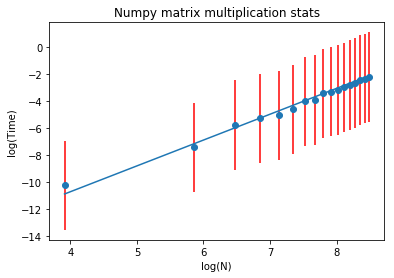

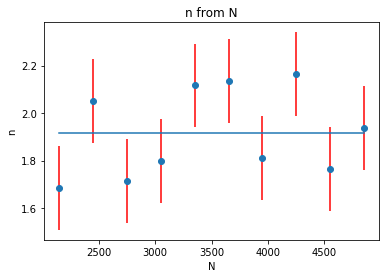

In [10]:

plt.figure(1)
plt.title('Numpy matrix multiplication stats')
plt.xlabel('log(N)')
plt.ylabel('log(Time)')
plt.errorbar(x, y, yerr=yerr, fmt='o', ecolor='red')
plt.plot(x, [n*(s - x[len(x) // 2]) + y[len(x) // 2] for s in x])
plt.grid()

plt.figure(2)
plt.title('n from N')
plt.xlabel('N')
plt.ylabel('n')
plt.errorbar(x1, y1, yerr=yerr1, fmt='o', ecolor='red')
plt.plot(x1, [n for s in x1])
plt.grid()


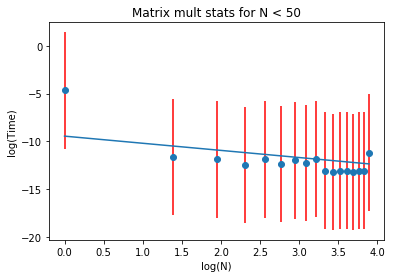

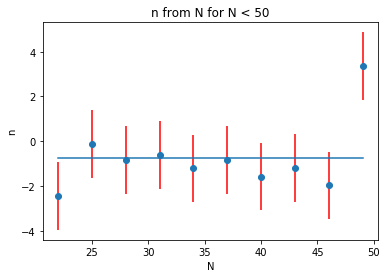

In [11]:
plt.figure(3)
plt.title('Matrix mult stats for N < 50')
plt.xlabel('log(N)')
plt.ylabel('log(Time)')
plt.errorbar(x_low, y_low, yerr=yerr_low, fmt='o', ecolor='red')
t = len(x_low) // 2
plt.plot(x_low, [n_low*(s_low - x_low[t]) + y_low[t] for s_low in x_low])
plt.grid()



plt.figure(4)
plt.title('n from N for N < 50')
plt.xlabel('N')
plt.ylabel('n')
plt.errorbar(x1_low, y1_low, yerr=yerr1_low, fmt='o', ecolor='red')
plt.plot(x1_low, [n_low for s_low in x1_low])
plt.grid()



In [12]:
plt.show()